# **What is this about?**

Apples are one of the most important temperate fruit crops in the world. Foliar (leaf) diseases pose a major threat to the overall productivity and quality of apple orchards. The current process for disease diagnosis in apple orchards is based on manual scouting by humans, which is time-consuming and expensive.

Although computer vision-based models have shown promise for plant disease identification, there are some limitations that need to be addressed. Large variations in visual symptoms of a single disease across different apple cultivars, or new varieties that originated under cultivation, are major challenges for computer vision-based disease identification. These variations arise from differences in natural and image capturing environments, for example, leaf color and leaf morphology, the age of infected tissues, non-uniform image background, and different light illumination during imaging etc.

Plant Pathology 2020-FGVC7 challenge competition had a pilot dataset of 3,651 RGB images of foliar disease of apples. For Plant Pathology 2021-FGVC8, we have significantly increased the number of foliar disease images and added additional disease categories. This year’s dataset contains approximately 23,000 high-quality RGB images of apple foliar diseases, including a large expert-annotated disease dataset. This dataset reflects real field scenarios by representing non-homogeneous backgrounds of leaf images taken at different maturity stages and at different times of day under different focal camera settings.





# Let Us See an Image

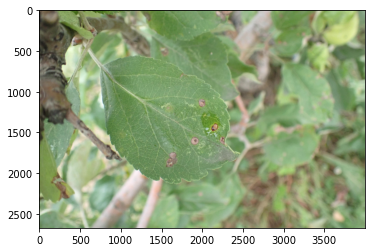

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as img
  
testImage = img.imread('../input/plant-pathology-2021-fgvc8/train_images/8002cb321f8bfcdf.jpg')
  
# displaying the image
plt.imshow(testImage)

# **Let Us Perform Some Image Operations that We Can Perform on This Image**

In [2]:
from matplotlib import pyplot as plt

def show_image(image, title='Image', cmap_type='gray'): 
  plt.imshow(image, cmap=cmap_type)
  plt.title(title)
  plt.axis('off')
  plt.show()

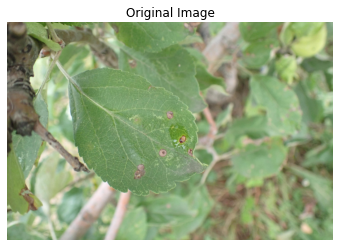

In [3]:
leaf_image = img.imread('../input/plant-pathology-2021-fgvc8/train_images/8002cb321f8bfcdf.jpg')
show_image(leaf_image, 'Original Image')

# Grayscale Image

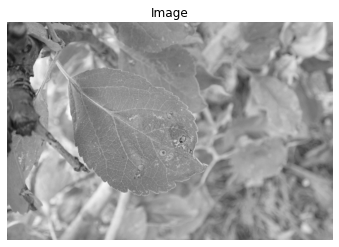

In [4]:
from skimage import color
leaf_image_gray = color.rgb2gray(leaf_image)
show_image(leaf_image_gray)

# Let Us See The Histogram Of An Image

<function matplotlib.pyplot.show(close=None, block=None)>

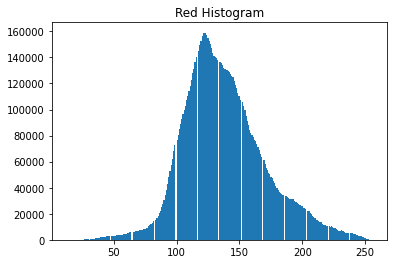

In [5]:
red = leaf_image[:, :, 0] # using the red channel of the rocket image.

plt.hist(red.ravel(), bins=256) # plot its histogram with 256 bins, the number of possible values of a pixel.
plt.title('Red Histogram')
plt.show

We notice that the frequency of the pixels varies between 25 to 250 , with most of it being in the region between 100 to 175 approximately

# Applying Thresholding Algorithms 

In [6]:
import cv2
leaf_img= cv2.imread('../input/plant-pathology-2021-fgvc8/train_images/8002cb321f8bfcdf.jpg')
grayimg = cv2.cvtColor(leaf_img,cv2.COLOR_BGR2GRAY)

**Grayscale Image**

New Image Shape (2672, 4000)


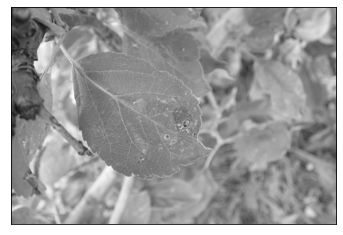

In [7]:
plt.imshow(grayimg,cmap='gray') #cmap has been used as matplotlib uses some default colormap to plot grayscale images
plt.xticks([]) #To get rid of the x-ticks and y-ticks on the image axis
plt.yticks([])
print('New Image Shape',grayimg.shape)

In [8]:
#Finding optimal threshold
from skimage.filters import threshold_otsu
thresh_val = threshold_otsu(grayimg)
print('The optimal seperation value is',thresh_val)

The optimal seperation value is 150


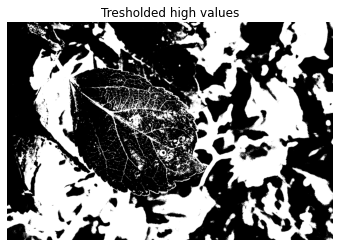

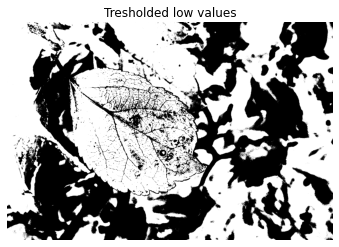

In [9]:
thresh = 120 # set a random thresh value

binary_high = grayimg > thresh_val
binary_low = grayimg <= thresh_val

show_image(binary_high, 'Tresholded high values')
show_image(binary_low, 'Tresholded low values')

**Trying All Thresholded Values**

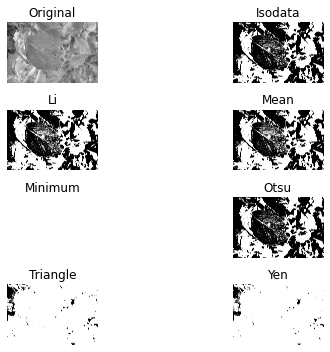

In [10]:
from skimage.filters import try_all_threshold

fig, ax = try_all_threshold(grayimg, verbose=False)

**We see that Iso data , Mean and Otsu , dives better results than the others so let us look at Otsu Thresholding**

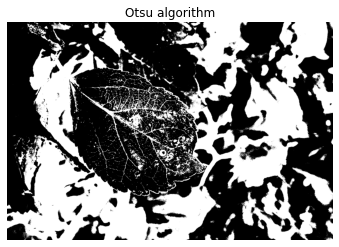

In [11]:
from skimage.filters import threshold_otsu

thresh = threshold_otsu(grayimg)

text_binary_otsu = grayimg > thresh

show_image(text_binary_otsu, 'Otsu algorithm')

# Applying Edge Detection Techniques on The Image

In [12]:
def plot_comparison(original, filtered, title_filtered):
  fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 6), sharex=True, sharey=True)
  ax1.imshow(original, cmap=plt.cm.gray) 
  ax1.set_title('original') 
  ax1.axis('off')
  ax2.imshow(filtered, cmap=plt.cm.gray) 
  ax2.set_title(title_filtered) 
  ax2.axis('off')

**Sobel Operator**

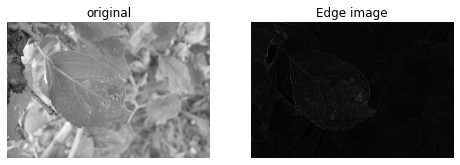

In [13]:
from skimage.filters import sobel

edge_image = sobel(grayimg) # apply the filter

plot_comparison(grayimg, edge_image, 'Edge image')

**We Can Now safely say , Sobel Operator , doesn't work on the image**

# Let Us Look at the Smoothening Features 

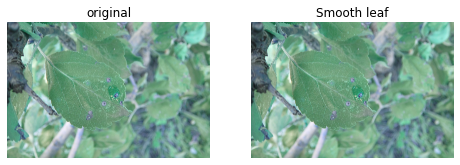

In [14]:
from skimage.filters import gaussian
smooth_leaf_image = gaussian(leaf_img, multichannel=True) # you have to specify the multichannel

plot_comparison(leaf_img, smooth_leaf_image, 'Smooth leaf')

# Contrast Enhancement Techniques

/opt/conda/lib/python3.7/site-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)


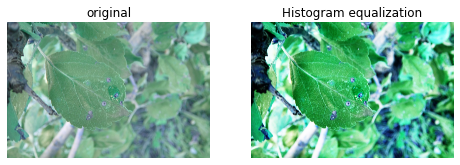

In [15]:
from skimage import exposure
equalized_leaf_image = exposure.equalize_hist(leaf_img)

plot_comparison(leaf_img, equalized_leaf_image, 'Histogram equalization')

**Note the leaves become more prominent by Histogram Equalization Techniques**

**ADAPTIVE HISTOGRAM EQUALISATION**

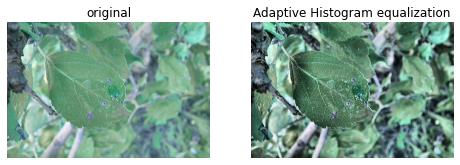

In [16]:
from skimage import exposure

adapthits_leag_image = exposure.equalize_adapthist(leaf_img)

plot_comparison(leaf_img, adapthits_leag_image, 'Adaptive Histogram equalization')

It seems to have a better representation of the image

# Now Let Us Finally Look at the Contour Methods

In [17]:
def show_image_contour(image, contours):
    plt.figure()
    for n, contour in enumerate(contours):
        plt.plot(contour[:, 1], contour[:, 0], linewidth=3)
    plt.imshow(image, interpolation='nearest', cmap='gray_r')
    plt.title('Contours')
    plt.axis('off')
    plt.show()

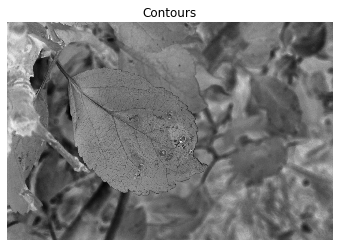

In [18]:
from skimage import measure



contours_gray_image = measure.find_contours(grayimg, 0.8)

show_image_contour(grayimg, contours_gray_image)

# Edge Detection

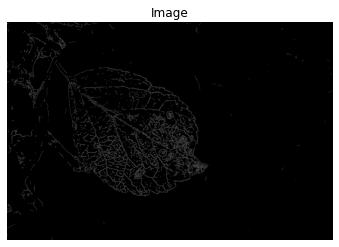

In [19]:
from skimage.feature import canny
canny_leaf_image = canny(grayimg)

show_image(canny_leaf_image)

**Interestingly it shows The Focused Leaf Properly**

# **Specific Objectives**

The main objective of the competition is to develop machine learning-based models to accurately classify a given leaf image from the test dataset to a particular disease category, and to identify an individual disease from multiple disease symptoms on a single leaf image.

# **Resources**
I thank Kaggle for providing the dataset and [Data](http://https://bsapubs.onlinelibrary.wiley.com/doi/10.1002/aps3.11390)
without whom this wouldn't have been Possible. 
Also I would like to thank [Ankur Singh](http://https://www.kaggle.com/ankursingh12/resized-plant2021) for this amazing dataset as without it , it would have taken hours and hours to train the below mentioned model. 

# Import the necessary libraries

In [20]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import PIL
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random
from tqdm import tqdm
import tensorflow_addons as tfa
import random
from sklearn.preprocessing import MultiLabelBinarizer
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.preprocessing import image
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, smart_resize
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation
from keras.constraints import maxnorm
from keras.layers.convolutional import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
import cv2
from PIL import Image
from keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model
from keras.metrics import AUC

pd.set_option("display.max_columns", None)

# **Let's Now Have a look at the Dataset and Study it better**

I would like to thank [Praveen](http://https://www.kaggle.com/praveengovi/plant-pathology-detail-eda-pytorch) for this amazing EDA and analysis and also [Arnab](http://https://www.kaggle.com/arnabs007/apple-leaf-diseases-with-inceptionresnetv2-keras) from whom I have taken reference from . I have implemented various EDA and studied from their models and approached it with Transfer Learning Model of ResNet 50v2 base.
 

In [21]:
train_dir= '../input/plant-pathology-2021-fgvc8/train_images'
test_dir =  '../input/plant-pathology-2021-fgvc8/test_images'
train = pd.read_csv('../input/plant-pathology-2021-fgvc8/train.csv')
#print(len(train))
#print(train.columns)
# print(train['labels'].value_counts())
#print(train['labels'].value_counts().plot.bar())

# Let's Study the dataset in a better way and try to find some interesting stuff!!! 

In [22]:
train.head

<bound method NDFrame.head of                       image                           labels
0      800113bb65efe69e.jpg                          healthy
1      8002cb321f8bfcdf.jpg  scab frog_eye_leaf_spot complex
2      80070f7fb5e2ccaa.jpg                             scab
3      80077517781fb94f.jpg                             scab
4      800cbf0ff87721f8.jpg                          complex
...                     ...                              ...
18627  fffb900a92289a33.jpg                          healthy
18628  fffc488fa4c0e80c.jpg                             scab
18629  fffc94e092a59086.jpg                             rust
18630  fffe105cf6808292.jpg          scab frog_eye_leaf_spot
18631  fffe472a0001bd25.jpg                          healthy

[18632 rows x 2 columns]>

**We get to know that we have "many" images with mostly 12 types of labels (but there is a twist) which we will comeback to later.**

Let's look at the number of images for various of 12 categories present

In [23]:
train['labels'].value_counts()

scab                               4826
healthy                            4624
frog_eye_leaf_spot                 3181
rust                               1860
complex                            1602
powdery_mildew                     1184
scab frog_eye_leaf_spot             686
scab frog_eye_leaf_spot complex     200
frog_eye_leaf_spot complex          165
rust frog_eye_leaf_spot             120
rust complex                         97
powdery_mildew complex               87
Name: labels, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


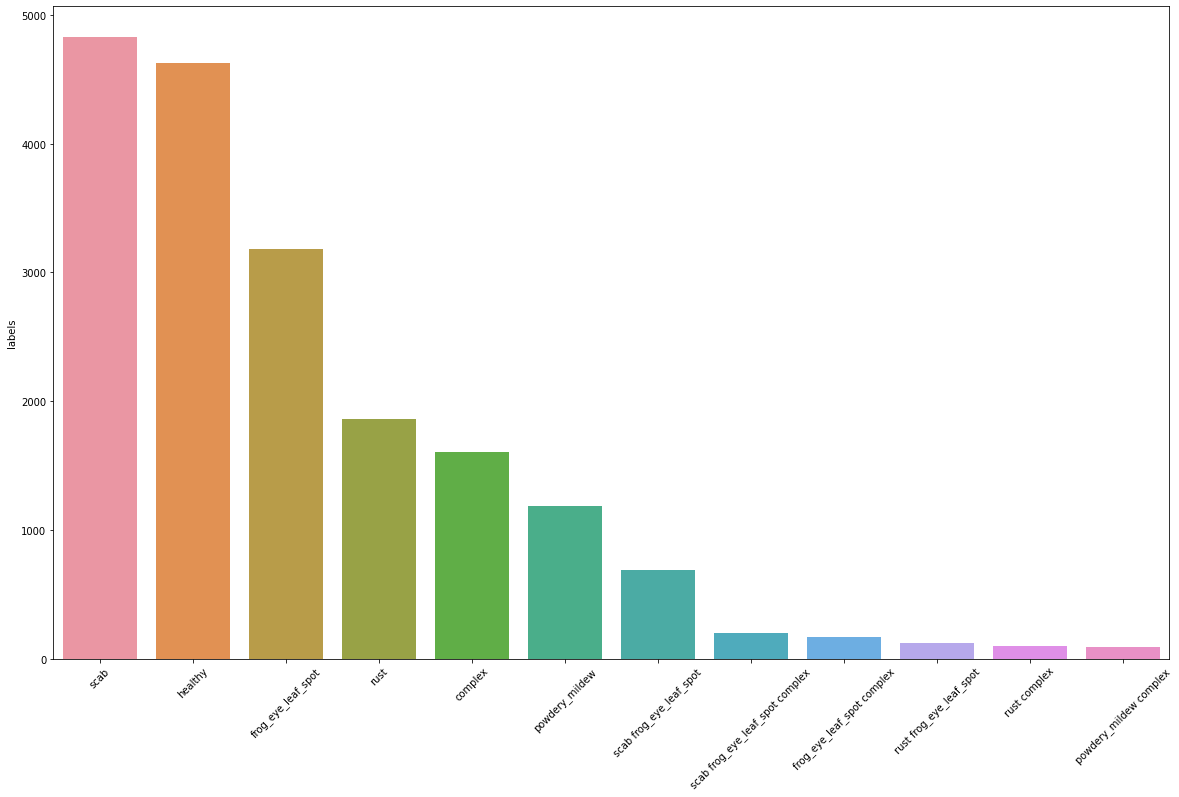

In [24]:
plt.figure(figsize=(20,12))
labels = sns.barplot(train.labels.value_counts().index,train.labels.value_counts())
for item in labels.get_xticklabels():
    item.set_rotation(45)

**Note**

Notice that there is a huge imbalance in dataset with "scab" having the highest number of frequency and "powdery_mildew complex" , the least

# Important Observation

**Look at the labels, doesn't it strike you ??** 

**Some of the labels are mixture of one or more types !!! And thus the problem becomes Multilabel Problem**


So there are not 12 labels, its actually just 6 labels.
5 diseases: 
1. rust
2. scab 
3. complex 
4. frog eye leaf spot
5. powdery mildew 

and another label is 

6. healthy (healthy leaves) 

Now the most important thing is, as one image can have multiple diseases, that means this problem is **Multi label classification** problem. Many get confused betweeen multilabel and multiclass classification. if you are new to multilabel classification I would suggest going over this [An introduction to MultiLabel classification](https://www.geeksforgeeks.org/an-introduction-to-multilabel-classification/) . 

So now we gotta process the labels. And then lets find out the actual frequencies of the labels. 


We divide it based on " " or space character , in order to get the labels for each of the image

In [25]:
train['labels'] = train['labels'].apply(lambda string: string.split(' '))
train

,image,labels
0,800113bb65efe69e.jpg,[healthy]
1,8002cb321f8bfcdf.jpg,"[scab, frog_eye_leaf_spot, complex]"
2,80070f7fb5e2ccaa.jpg,[scab]
3,80077517781fb94f.jpg,[scab]
4,800cbf0ff87721f8.jpg,[complex]
...,...,...
18627,fffb900a92289a33.jpg,[healthy]
18628,fffc488fa4c0e80c.jpg,[scab]
18629,fffc94e092a59086.jpg,[rust]
18630,fffe105cf6808292.jpg,"[scab, frog_eye_leaf_spot]"


Converting the labels representation into **one hot encoded format** using MultilabelBinarizer from Scikit learn. Now we can see and plot the frequencies of each label. 

In [26]:
s = list(train['labels'])
mlb = MultiLabelBinarizer()
trainx = pd.DataFrame(mlb.fit_transform(s), columns=mlb.classes_, index=train.index)
print(trainx.columns)


Index(['complex', 'frog_eye_leaf_spot', 'healthy', 'powdery_mildew', 'rust',
       'scab'],
      dtype='object')


These are the 6 different labels 

In [27]:
print(trainx.sum())

complex               2151
frog_eye_leaf_spot    4352
healthy               4624
powdery_mildew        1271
rust                  2077
scab                  5712
dtype: int64


<AxesSubplot:>

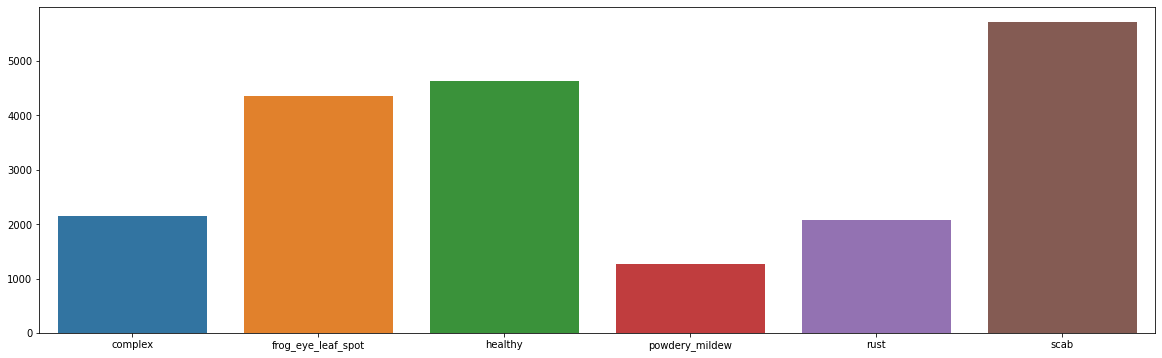

In [28]:
labels = list(trainx.sum().keys())
#print(labels)
label_counts = trainx.sum().values.tolist()

fig, ax = plt.subplots(1,1, figsize=(20,6))

sns.barplot(x= labels, y= label_counts, ax=ax)

**NOW WE CAN SEE THE DATASET BECOMES MORE OR LESS BALANCED , AT LEAST BETTER THAN WHAT IT WAS PREVIOUSLY!**

# Let's See the Plant Pathology Images

In [29]:
labels = pd.concat([train['image'], trainx], axis=1)
labels.head()

,image,complex,frog_eye_leaf_spot,healthy,powdery_mildew,rust,scab
0,800113bb65efe69e.jpg,0,0,1,0,0,0
1,8002cb321f8bfcdf.jpg,1,1,0,0,0,1
2,80070f7fb5e2ccaa.jpg,0,0,0,0,0,1
3,80077517781fb94f.jpg,0,0,0,0,0,1
4,800cbf0ff87721f8.jpg,1,0,0,0,0,0


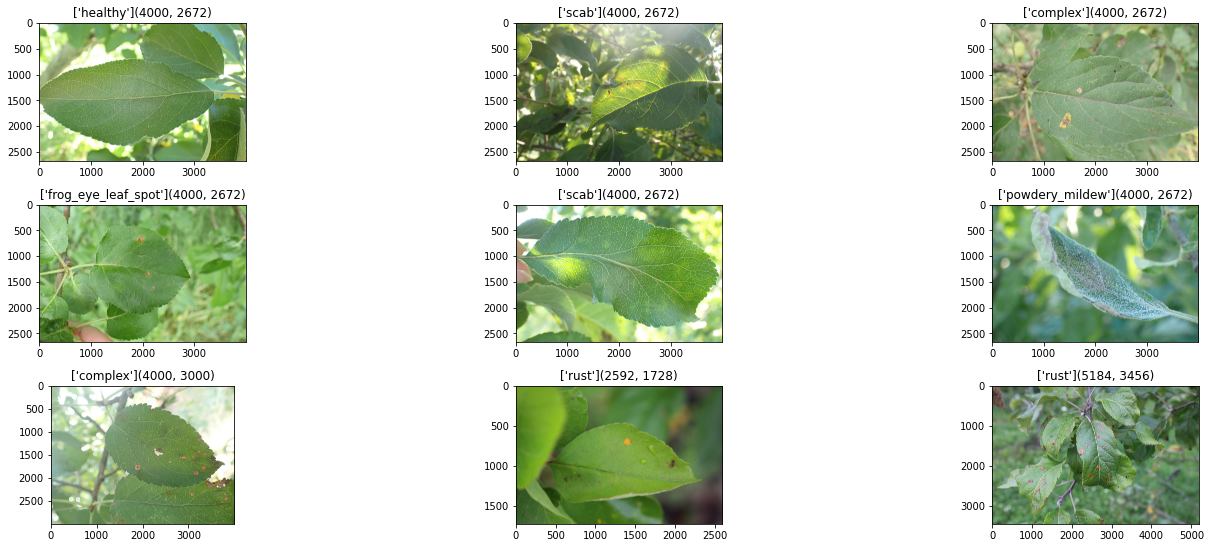

In [30]:
fig1 = plt.figure(figsize=(20,10))

for i in range(1, 10):
    
    rand =  random.randrange(1, 18000)
    sample = os.path.join('../input/plant-pathology-2021-fgvc8/train_images/', train['image'][rand])
    
    img = PIL.Image.open(sample)
    
    ax = fig1.add_subplot(4,3,i)
    ax.imshow(img)
    
    title = f"{train['labels'][rand]}{img.size}"
    plt.title(title)
    
    fig1.tight_layout()


# Imaze Size & Processing
from the titles we can see some random image sizes - (4000, 2672). Larger images are harder to process hence takes much longer to train the CNN. Downsampling all these 18632 images is also a time consuming task. This is I am going to use the resized imaged for this dataset [resized-plant2021](https://www.kaggle.com/ankursingh12/resized-plant2021) by Ankur Singh. He has already downsampled the images into size of 256, 384, 512 & 640px.
Now for Pre Processing I take help of the [Keras Image Data Generator](http://https://keras.io/api/preprocessing/image/). We transform it to size of (256,256,3) .

In [31]:
%%time
datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0,
                                                        preprocessing_function=None,
                                                        data_format=None,
                                                    )

train_data = datagen.flow_from_dataframe(
    train,
    directory= '../input/resized-plant2021/img_sz_512',
    x_col="image",
    y_col= 'labels',
    color_mode="rgb",
    target_size = (256,256),
    class_mode="categorical",
    batch_size=32,
    shuffle=False,
    seed=40,
)

Found 0 validated image filenames belonging to 0 classes.
CPU times: user 92.8 ms, sys: 22.2 ms, total: 115 ms
Wall time: 125 ms


/opt/conda/lib/python3.7/site-packages/keras_preprocessing/image/dataframe_iterator.py:282: UserWarning: Found 18632 invalid image filename(s) in x_col="image". These filename(s) will be ignored.
  .format(n_invalid, x_col)


# If you liked the Notebook Please Upvote It ! 

# Thank You